In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv(r'C:\Users\limbu\Laptop_recommendation\data\raw\laptop.csv')
df.head()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


In [11]:
df['Price'] = df['Price'].str.replace('₹','').str.replace(',','').astype(float)


In [14]:
df['Ram_GB'] = df['Ram'].str.extract(r'(\d+)').astype(int)


In [16]:
df['SSD_GB'] = df['SSD'].str.extract(r'(\d+)').astype(float).astype('Int64')


In [17]:
df['Display_inch'] = df['Display'].str.extract(r'(\d+\.?\d*)').astype(float)


In [18]:
def core_to_num(core_str):
    mapping = {
        'Dual Core': 2,
        'Quad Core': 4,
        'Hexa Core': 6,
        'Octa Core': 8,
        'Deca Core': 10
    }
    for key in mapping:
        if key in core_str:
            return mapping[key]
    return None

df['Core_Count'] = df['Core'].apply(core_to_num)


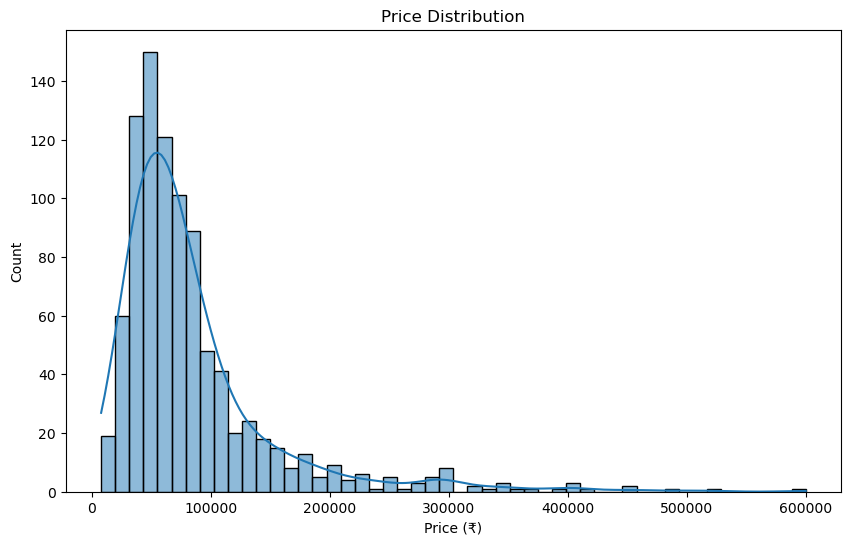

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (₹)')
plt.show()


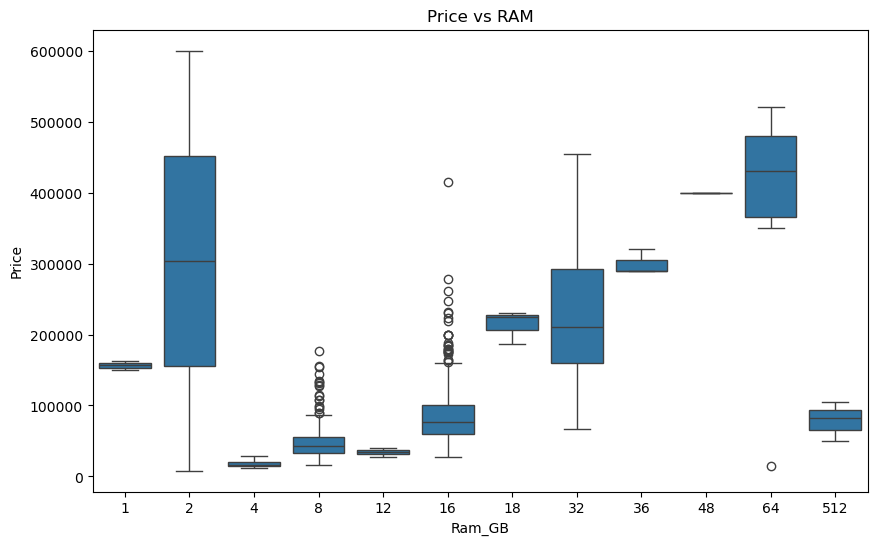

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Ram_GB', y='Price', data=df)
plt.title('Price vs RAM')
plt.show()


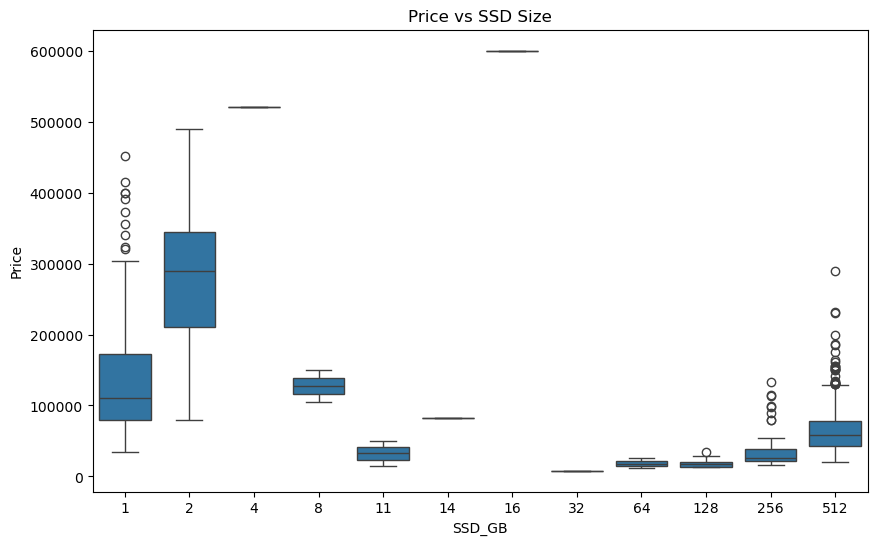

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SSD_GB', y='Price', data=df)
plt.title('Price vs SSD Size')
plt.show()


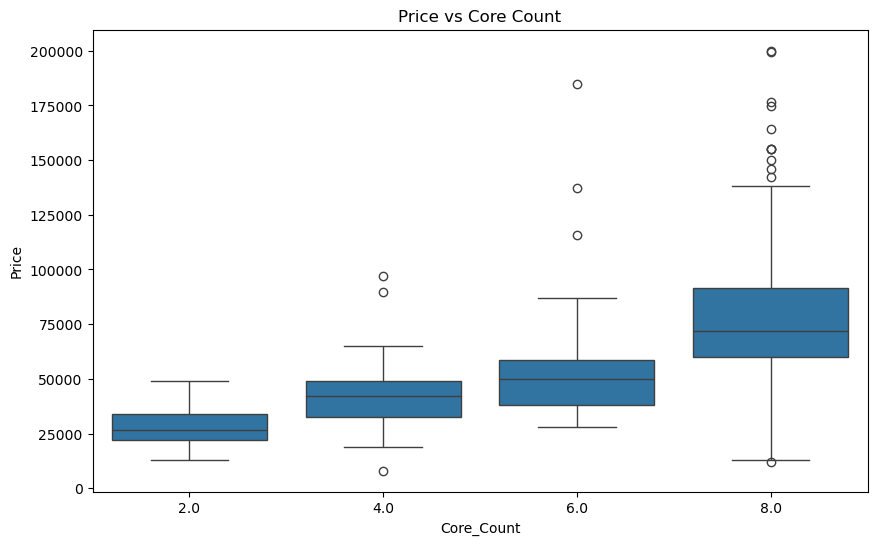

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Core_Count', y='Price', data=df)
plt.title('Price vs Core Count')
plt.show()


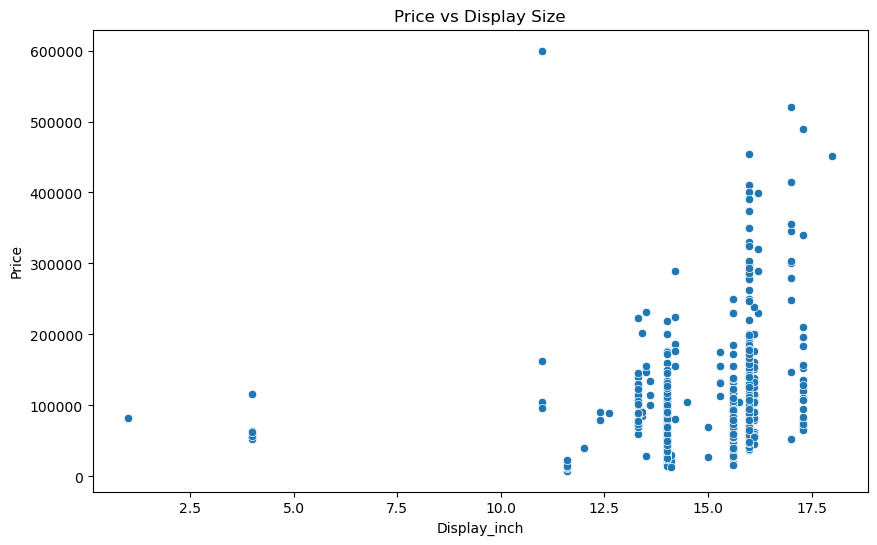

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Display_inch', y='Price', data=df)
plt.title('Price vs Display Size')
plt.show()


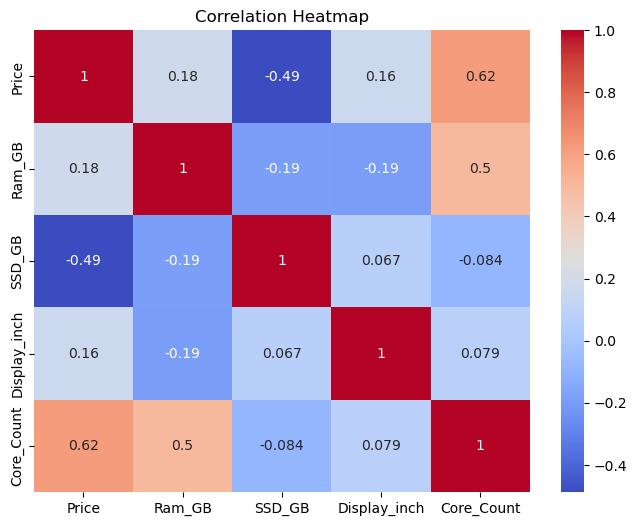

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Price', 'Ram_GB', 'SSD_GB', 'Display_inch', 'Core_Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
